## <b> <span style='color:#e61227'>|</span> Brain Tumor Detection With YOLOv8 </b> 

![](https://pub.mdpi-res.com/diagnostics/diagnostics-11-01856/article_deploy/html/images/diagnostics-11-01856-g002.png?1633696527)

In [1]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
display.clear_output()

In [2]:
# Import Essential Libraries
import os
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Load a pretrained YOLOv8n model from Ultralytics
T_Model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 86.7MB/s]


In [5]:
# Define the dataset_path
yaml_file_path = '/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/data.yaml'

# Train the model on our custom dataset
results = T_Model.train( data= yaml_file_path,epochs=50,patience=20, batch= -1, optimizer='auto')

Ultralytics 8.3.144 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pa

100%|██████████| 755k/755k [00:00<00:00, 17.8MB/s]
2025-05-25 23:12:00,136	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-05-25 23:12:00,883	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 10.5±5.0 MB/s, size: 31.9 KB)


train: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train/labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:05<00:00, 406.96it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.30G reserved, 0.06G allocated, 14.38G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3011433       8.196         0.650         62.04         539.2        (1, 3, 640, 640)                    list
     3011433       16.39         0.734         23.22         204

train: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train/labels... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:02<00:00, 970.13it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 10.6±4.6 MB/s, size: 30.9 KB)


val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:01<00:00, 383.87it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005234375), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      8.33G      1.346      3.952      1.426        116        640: 100%|██████████| 32/32 [00:24<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        612        612    0.00323      0.597      0.176      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.78G      1.238      2.574       1.31        105        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        612        612      0.508      0.311      0.377      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.78G      1.282      2.183      1.356        105        640: 100%|██████████| 32/32 [00:21<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        612        612      0.699     0.0374     0.0246     0.0139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.78G      1.269      1.882      1.345        107        640: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        612        612      0.272      0.159     0.0856     0.0501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.78G      1.248      1.662      1.324        102        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        612        612      0.782      0.154      0.169      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.78G      1.205      1.446      1.305        116        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.07it/s]

                   all        612        612      0.856       0.23      0.421      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.77G      1.174       1.39      1.289        112        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        612        612      0.627      0.571      0.615      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.77G      1.131      1.272       1.26        100        640: 100%|██████████| 32/32 [00:21<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        612        612      0.678      0.628      0.671      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.77G      1.165      1.244      1.264        111        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        612        612      0.639      0.532      0.589      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.77G      1.124      1.223      1.254        108        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        612        612       0.55      0.656      0.662      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.77G      1.104      1.156      1.237        108        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        612        612      0.697      0.625      0.649      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.77G      1.077      1.104      1.232        105        640: 100%|██████████| 32/32 [00:21<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.08it/s]

                   all        612        612      0.711       0.68       0.73      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.77G      1.074      1.082      1.218        104        640: 100%|██████████| 32/32 [00:21<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        612        612      0.743      0.693      0.742      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.77G      1.074      1.043      1.227         96        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        612        612      0.763      0.601      0.707      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.77G      1.065      1.011      1.215        107        640: 100%|██████████| 32/32 [00:21<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        612        612      0.747      0.722      0.733      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.77G      1.075      1.021      1.225         99        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        612        612      0.801      0.789       0.83      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.77G      1.034     0.9861      1.197        119        640: 100%|██████████| 32/32 [00:21<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        612        612      0.777      0.735      0.802      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.77G     0.9991     0.9297      1.173        109        640: 100%|██████████| 32/32 [00:21<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.11it/s]

                   all        612        612      0.783      0.765      0.816      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.77G      1.008     0.9259      1.179         99        640: 100%|██████████| 32/32 [00:21<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.17it/s]

                   all        612        612      0.819      0.759      0.841      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.77G       1.01     0.9106      1.184        121        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        612        612      0.705       0.67      0.721      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.77G     0.9757     0.8761      1.161        101        640: 100%|██████████| 32/32 [00:22<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        612        612      0.757      0.779      0.833      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.77G     0.9718     0.8733      1.167        116        640: 100%|██████████| 32/32 [00:21<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        612        612      0.829      0.699      0.815      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.77G     0.9584     0.8319      1.153        110        640: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        612        612      0.664       0.67      0.728      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.77G     0.9747      0.846      1.156        113        640: 100%|██████████| 32/32 [00:21<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        612        612      0.819      0.757       0.83      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.77G     0.9405     0.8092      1.137        105        640: 100%|██████████| 32/32 [00:21<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        612        612      0.819      0.747      0.837       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.77G     0.9625     0.8245      1.154        105        640: 100%|██████████| 32/32 [00:21<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        612        612      0.855      0.791      0.875       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.77G      0.936      0.795      1.136         92        640: 100%|██████████| 32/32 [00:21<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        612        612      0.798      0.775      0.864      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.77G     0.9093     0.7528      1.124        102        640: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        612        612      0.894      0.778      0.877      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.77G     0.9081     0.7342      1.106        122        640: 100%|██████████| 32/32 [00:21<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        612        612      0.846      0.782      0.866      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.77G     0.8965     0.7288      1.111        114        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        612        612      0.835      0.813      0.879      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.77G     0.9138     0.7489      1.125        112        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]

                   all        612        612      0.815      0.829       0.88      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.77G     0.8878     0.7225      1.104         99        640: 100%|██████████| 32/32 [00:21<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.16it/s]

                   all        612        612      0.885      0.814      0.899      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.77G     0.8742     0.7012      1.103        112        640: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        612        612      0.871      0.834      0.883      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.77G     0.8661     0.6866       1.09        111        640: 100%|██████████| 32/32 [00:21<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        612        612      0.879      0.831      0.887      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.77G     0.8603     0.6675      1.086        102        640: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        612        612      0.848      0.865      0.901      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.77G     0.8521     0.6481      1.087         94        640: 100%|██████████| 32/32 [00:21<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        612        612      0.838      0.871      0.899      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.77G     0.8377     0.6466      1.079        111        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        612        612      0.843      0.843      0.897      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.77G     0.8336      0.633      1.075        103        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        612        612       0.89      0.832      0.904      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.77G     0.8129     0.6133      1.067        123        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]

                   all        612        612      0.874      0.846      0.903      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.77G     0.8006     0.6118      1.059        110        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.14it/s]

                   all        612        612      0.909      0.823       0.91      0.691


Closing dataloader mosaic
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      8.49G     0.7368     0.5235       1.01         67        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.18it/s]

                   all        612        612      0.883      0.836      0.906      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.77G     0.6983       0.46     0.9872         66        640: 100%|██████████| 32/32 [00:20<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        612        612      0.893      0.862      0.916      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.77G     0.6912     0.4465      0.983         67        640: 100%|██████████| 32/32 [00:20<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        612        612      0.907      0.849      0.921        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.77G     0.6743       0.43     0.9707         66        640: 100%|██████████| 32/32 [00:21<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.23it/s]

                   all        612        612      0.882      0.862      0.915      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.77G     0.6596     0.4113     0.9658         67        640: 100%|██████████| 32/32 [00:21<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        612        612      0.903      0.859      0.918      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.77G     0.6503     0.4078     0.9584         66        640: 100%|██████████| 32/32 [00:21<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.25it/s]

                   all        612        612      0.889      0.881      0.925       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.77G     0.6429     0.3964     0.9539         67        640: 100%|██████████| 32/32 [00:19<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.09it/s]

                   all        612        612      0.878      0.891      0.923      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.77G     0.6378     0.3826     0.9493         67        640: 100%|██████████| 32/32 [00:20<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        612        612      0.883      0.876      0.923      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.77G     0.6162     0.3704      0.939         67        640: 100%|██████████| 32/32 [00:21<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.25it/s]

                   all        612        612      0.889       0.87      0.923      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.77G     0.6118     0.3682     0.9404         66        640: 100%|██████████| 32/32 [00:21<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        612        612      0.892      0.875      0.924      0.711



50 epochs completed in 0.374 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]


                   all        612        612       0.89      0.869      0.923      0.711
                glioma        285        285      0.802      0.747      0.833      0.553
            meningioma        142        142      0.964      0.931      0.979      0.832
             pituitary        185        185      0.904       0.93      0.956      0.748
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train2


In [7]:
# Define the path to the directory
post_training_files_path = '/kaggle/working/runs/detect/train2'

# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, '/kaggle/working/runs/detect/train2/weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path)

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')

Ultralytics 8.3.144 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.3 ms, read: 85.9±5.5 MB/s, size: 32.4 KB)


val: Scanning /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid/labels... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<00:00, 757.29it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  5.42it/s]


                   all        612        612       0.89       0.87      0.923      0.711
                glioma        285        285      0.802      0.747      0.833      0.552
            meningioma        142        142      0.964      0.932      0.979      0.832
             pituitary        185        185      0.904       0.93      0.956      0.747
Speed: 0.8ms preprocess, 6.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


In [12]:

# Convert the dictionary to a pandas DataFrame and use the keys as the index
# metrics_df = metrics.rename(columns={'some_column': 'Metric Value'})
# metrics_df

metrics_df = pd.DataFrame.from_dict(metrics.speed, orient='index', columns=['Time (ms)'])
print(metrics_df)

             Time (ms)
preprocess    0.837292
inference     6.470412
loss          0.000702
postprocess   0.930702


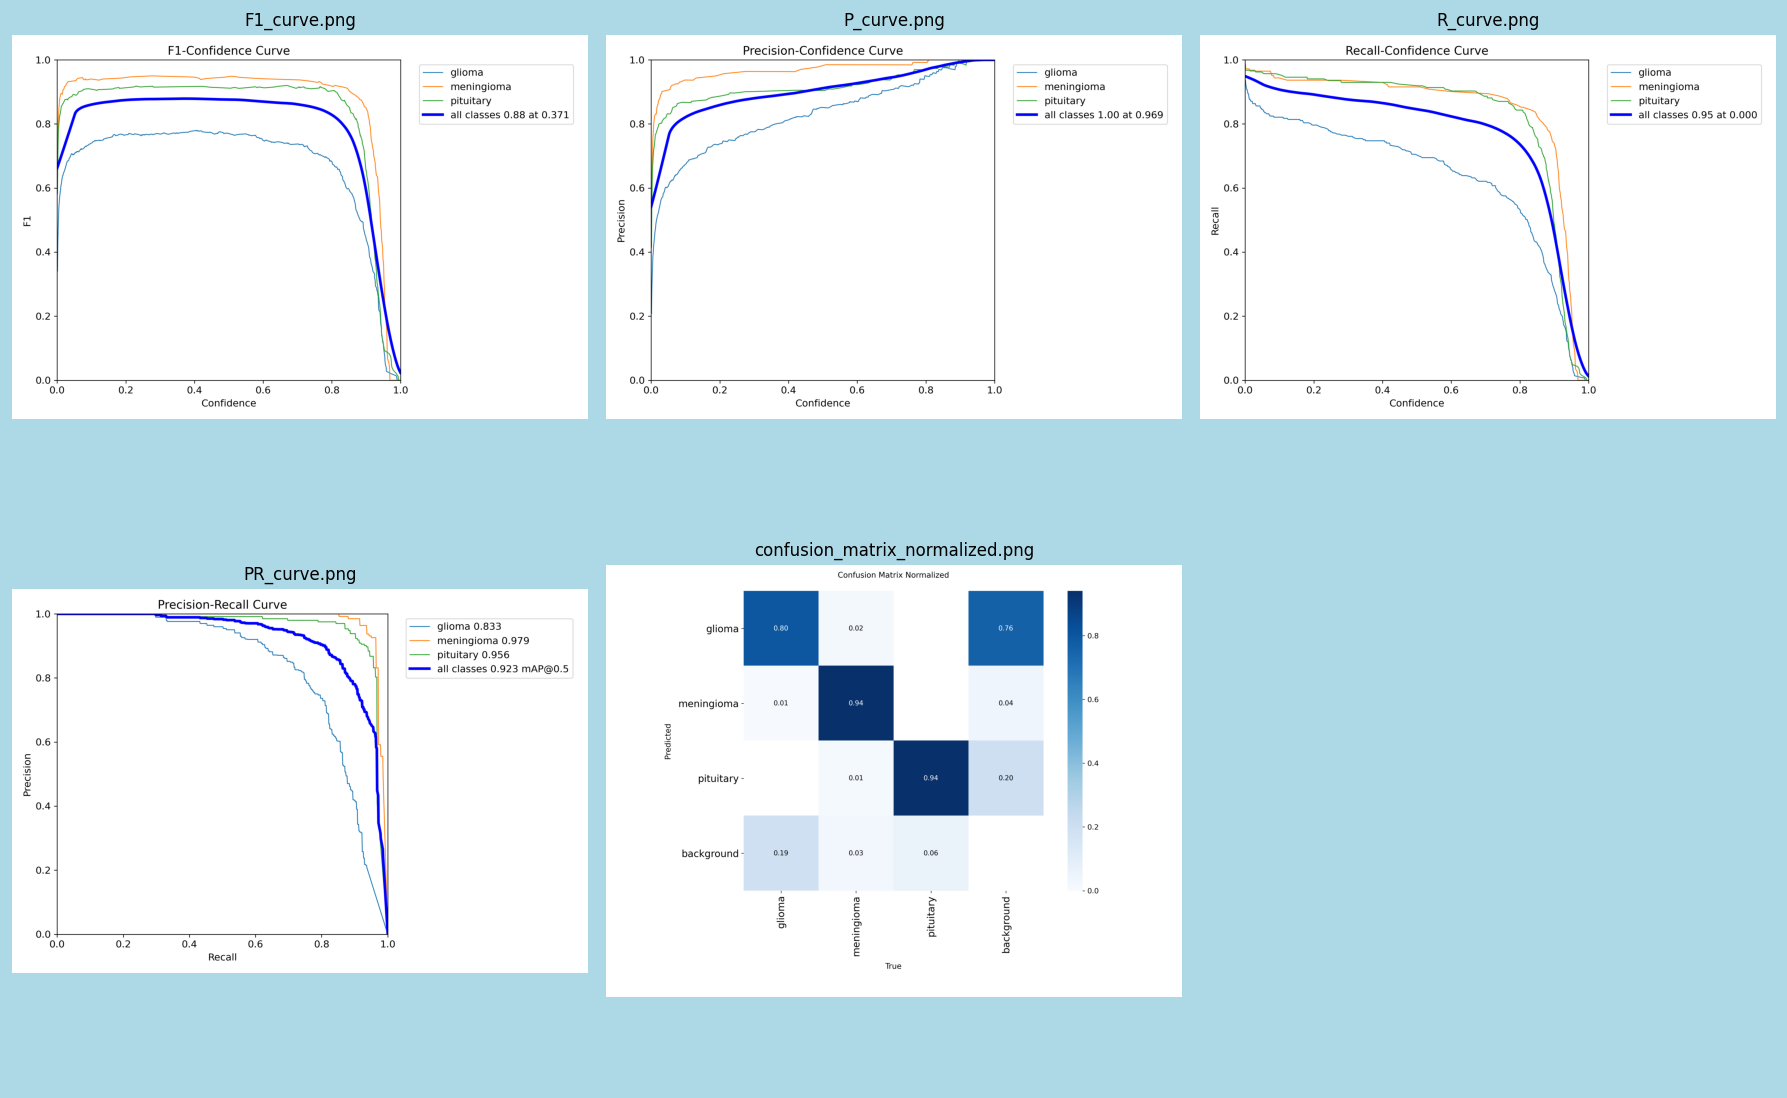

In [14]:
def display_images_in_frame_with_background(post_training_files_path, image_files, background_color='lightgray'):
    # Calculate grid size (rows and columns)
    num_images = len(image_files)
    cols = 3  # Number of columns (you can adjust this as needed)
    rows = (num_images + cols - 1) // cols  # Calculate the number of rows needed
    
    # Set up the subplot grid
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), dpi=120)
    fig.patch.set_facecolor(background_color)  # Set the figure background color
    axes = axes.flatten()  # Flatten to easily index
    
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axes[i].imshow(img)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_file, fontsize=10, color='black')  # Add title with black text
    
    # Turn off unused subplots if any
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# List of image files to display
image_files = [
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'confusion_matrix_normalized.png',

]

# Path to the directory containing the images
post_training_files_path = '/kaggle/working/runs/detect/train2'

# Display the images with a background color
display_images_in_frame_with_background(post_training_files_path, image_files, background_color='lightblue')



0: 640x640 1 glioma, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 meningioma, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 7.7ms
Speed: 2.0ms preprocess, 7.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 meningioma, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 gliomas, 7.3ms
Speed: 2.0ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 pituitary, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 0.8ms postprocess per image at sh

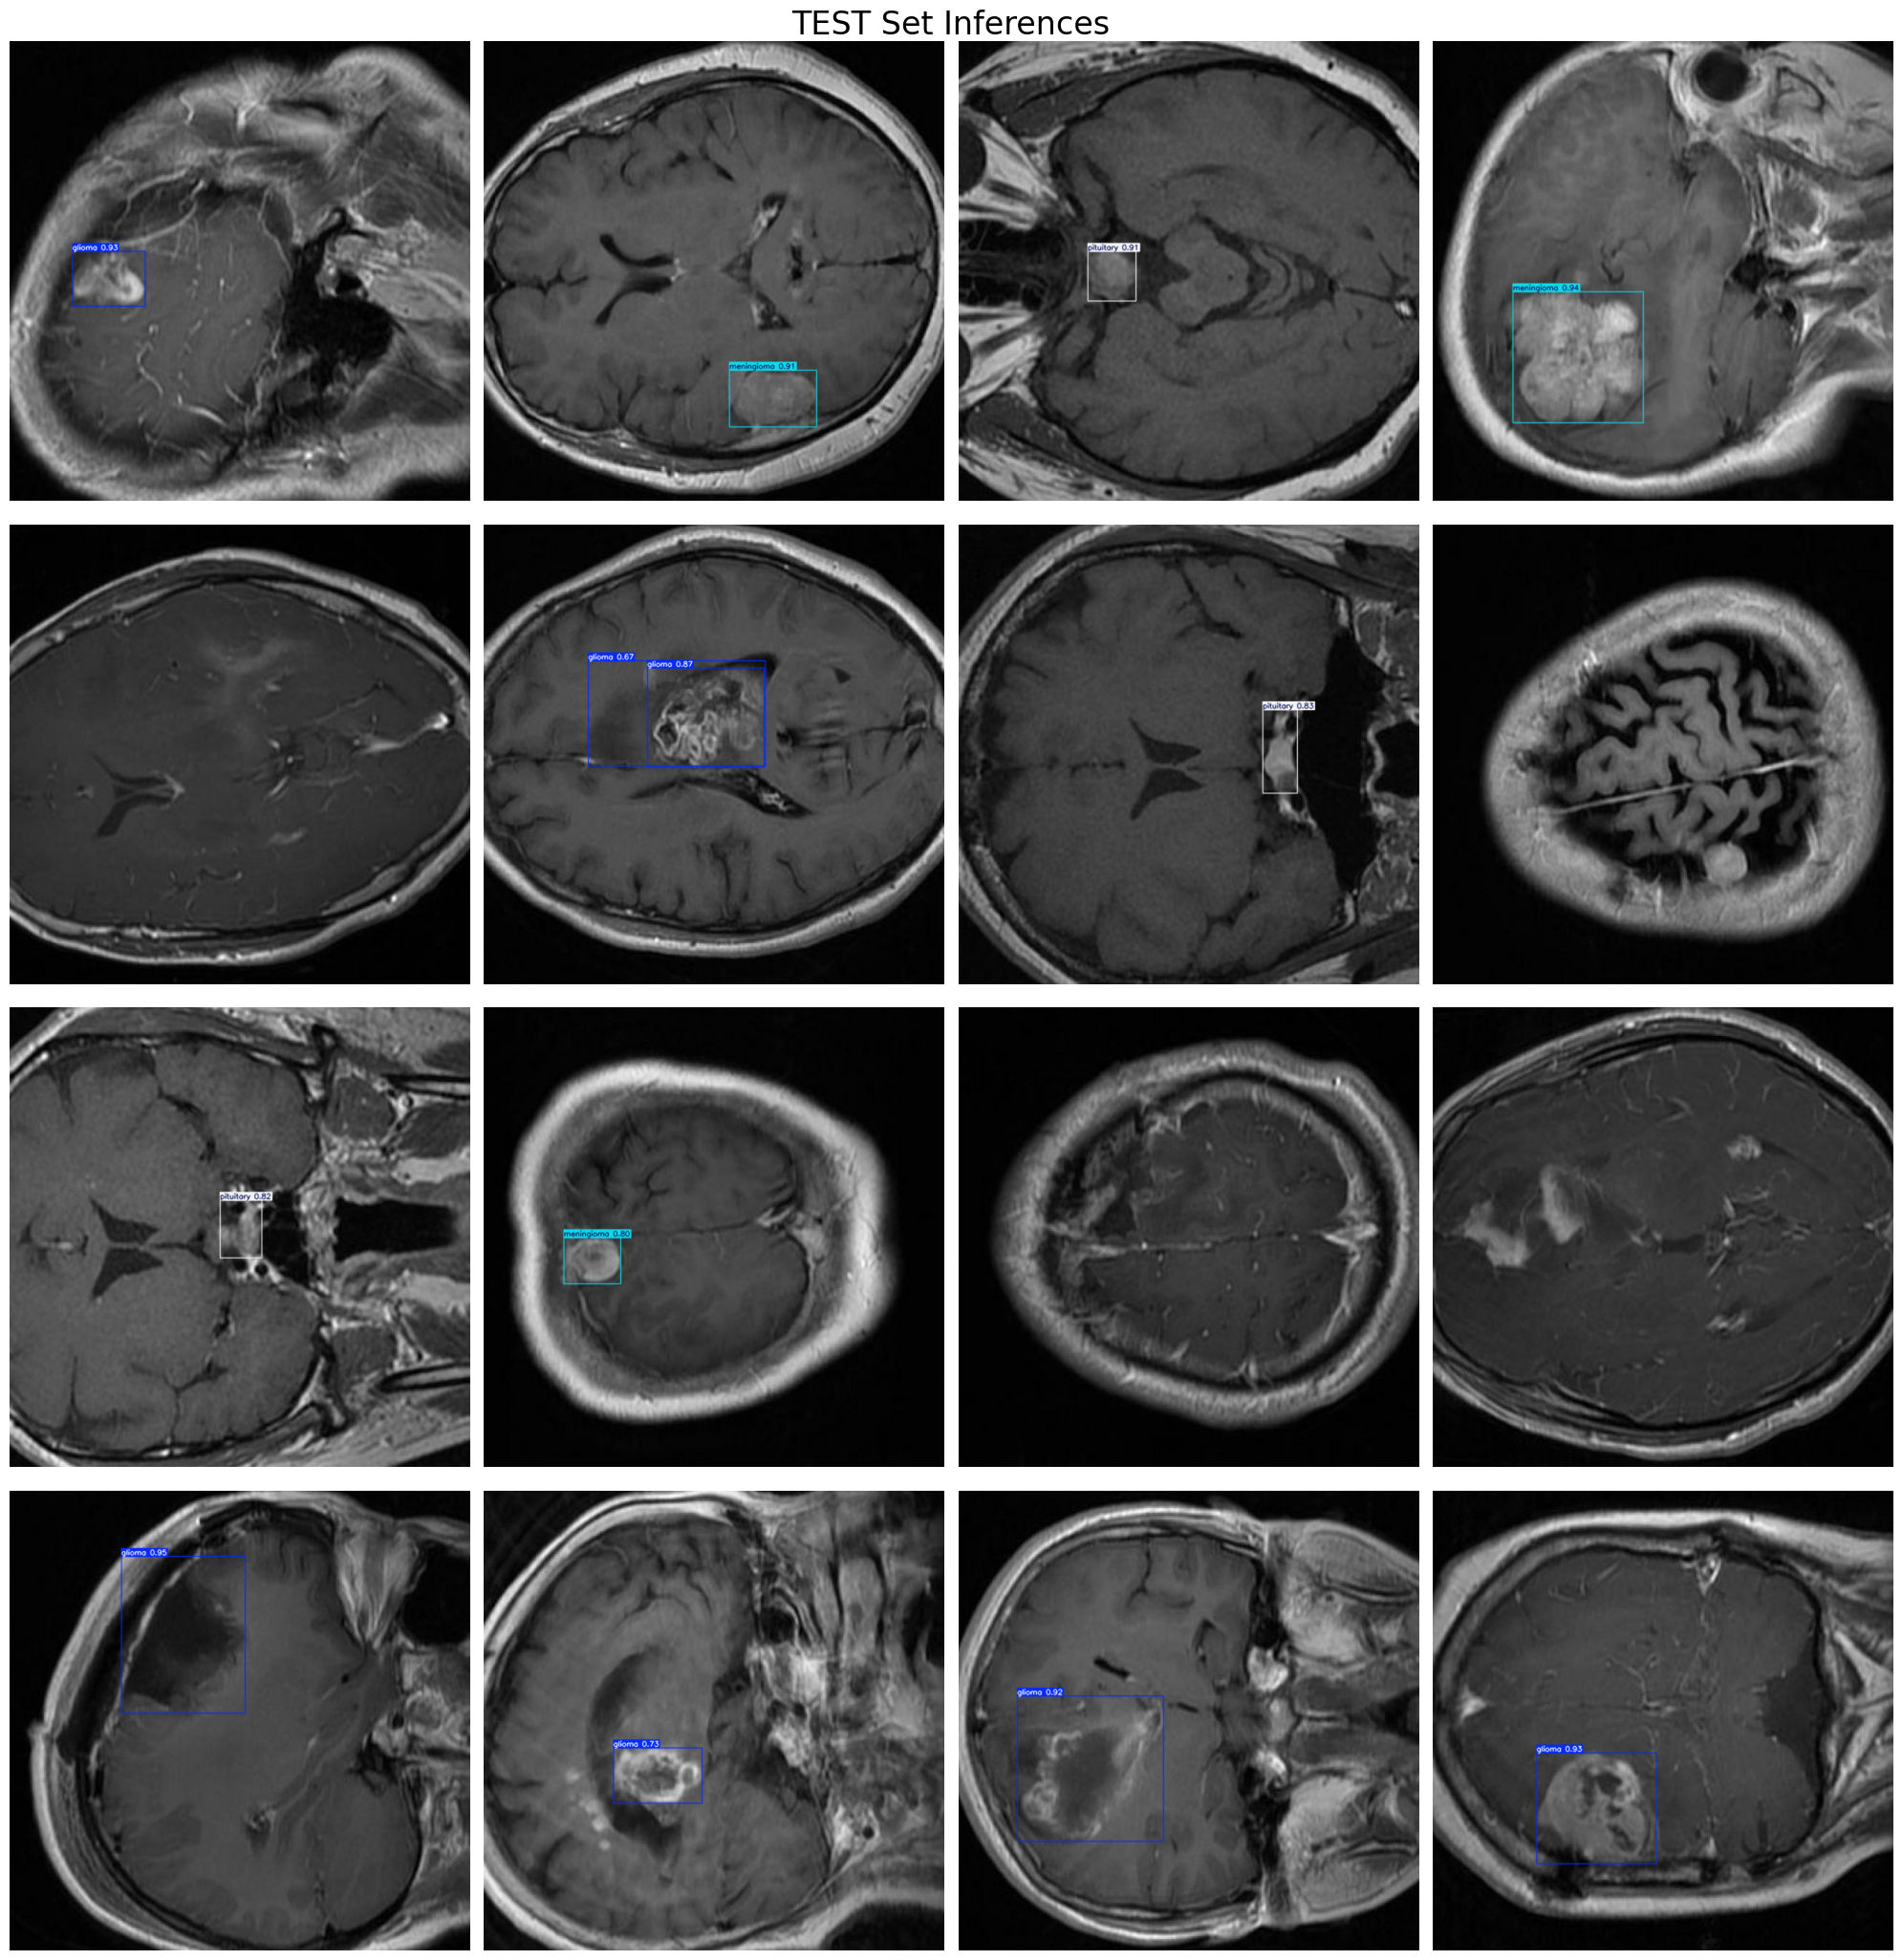

In [15]:
# Validation of Model by TestSet

# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/medical-image-dataset-brain-tumor-detection/BrainTumor/BrainTumorYolov8'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 16)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(4, 4, figsize=(20, 21))
    fig.suptitle('TEST Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()



0: 640x640 1 meningioma, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


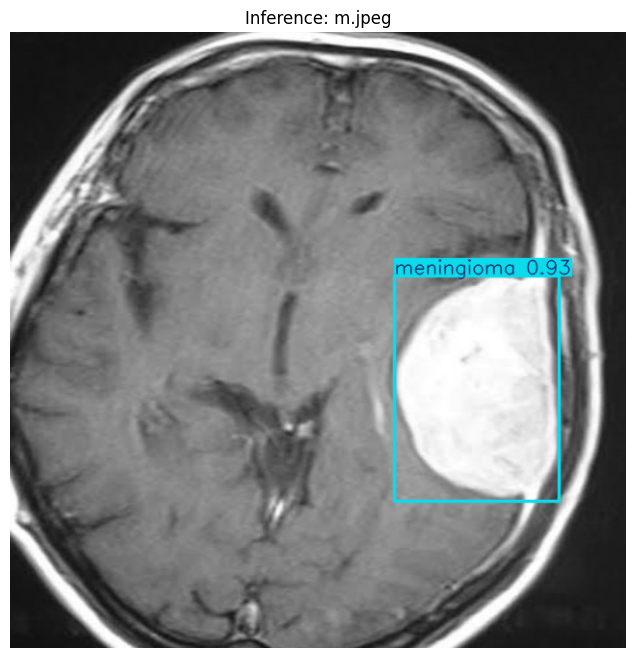

In [17]:
def show_single_prediction(image_path, model_path, image_size=(640, 640), conf=0.5):
    # load model
    model = YOLO(model_path)

    # read image
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Image is not found: {image_path}")
        return

    # resize (optional)
    image_resized = cv2.resize(image, image_size)

    # predict with YOLO
    results = model.predict(source=image_resized, imgsz=image_size[0], conf=conf)

    # draw anotations
    annotated = results[0].plot()
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    # show image
    plt.figure(figsize=(8, 8))
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.title(f"Inference: {os.path.basename(image_path)}", fontsize=12)
    plt.show()

# 🔧 inputs
image_path = '/kaggle/input/imagem/m.jpeg'
model_path = '/kaggle/working/runs/detect/train2/weights/best.pt'

# 🔍 show result
show_single_prediction(image_path, model_path)
